In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

Warning: fetch_mldata() is deprecated since Scikit-Learn 0.20. You should use fetch_openml() instead. However, it returns the unsorted MNIST dataset, whereas fetch_mldata() returned the dataset sorted by target (the training set and the test test were sorted separately).

In [4]:
# sort the dataset 
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [5]:
# getting data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [6]:
# check to make sure we loaded correctly 
mnist["data"], mnist["target"] # so we have two arrays

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [7]:
X, y = mnist["data"], mnist['target'] # assigning objects 

In [8]:
X.shape # row by column
# there are 70,000 images, and each image has 784 features

(70000, 784)

In [9]:
y.shape # rows no columns, you can see up top that this is not a matrix like mnist['data']

(70000,)

If you are not familiiar with this data set. There are 70,000 images and each image has 784 features. This is because each image is 28x28 pixels, and eah feature represents one pixel's intensity from 0 (white) to 255 (black)

(-0.5, 27.5, 27.5, -0.5)

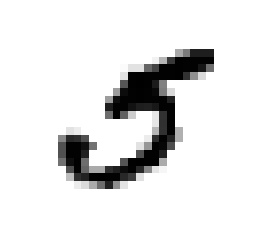

In [10]:
# take a look a one image so we can see what we are working with 
some_digit = X[36000] # remember we assigned the mnist['data'] to X
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off") # remocing axis, not a graph
# okay so this image looks like a 5

In [11]:
# check the label to see if this is correct
y[36000] # remember we assigned the mnist['traget'] to y

5

# Training Binary Classifier

In [12]:
# Before we do anything else, we will split the data into a training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# we are taking the first 60000 images and splitting them into our test and train sets. 
# we will then run the final model on the last 10000

In [13]:
# becuase we are not working with time series data. We will shuffle the data to induce some randomness
# numpy operation
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
# Now we are going to train a binrary classifier
# Start by creating a classifer to indentify a number as 5(yes) or not 5(no)
y_train_5 = (y_train == 5) #True for all 5's and flase for anything else
y_test_5 = (y_test == 5)

In [15]:
# begin with Stochastic Gradient Decent (SGD)
# good for large data sets, handles each training instance independantly 
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state = 101) # SGDC relies on randomness, setting a random_state for reproduction ability
sgd_clf.fit(X_train, y_train_5) # remember we are doing binary classification on 5

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=101, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# use to detect images of the number 5
sgd_clf.predict([some_digit]) # remember we assigned this earlier in exploring the data
# and it is wrong IN THIS CASE
# we need to train the the model 
## if you set the random state to 42 it will predict TRUE

array([ True])

In [18]:
# Measure the Accuracy using Cross-Validation
# using K number of folds splitting the data into K, making predictions, 
## then evaluating each fold using a model trained on the remaining folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy") # cv = 3 = 3 folds
# notice how we get a warning about upcoming changes every time a fold is created and used to train
# see how the accuracy imporoves with each fold from 1 to 2 to 3
# these accuracy scores are the ratio of correct predictions

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.96425, 0.95715, 0.962  ])

In [19]:
# we can also reverse the apporach, by training a 'dumber' model to just look at the data and classify 
## it as not 5 using Base estimation
from sklearn.base import BaseEstimator

In [20]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.90765, 0.9134 , 0.9079 ])

This model has 91% accuracy. This is simply because only about 9-10% of the data is actually a 5. Therefore, if you guess that the feature is not 5, you will be correct 91% of the time. Instant A-. This demostrates why accuracy is not a good performance measure for classifiers or skewed data sets. As always you should plot your data when applicable. 

In [22]:
# Using a confusion matrix
## we do not want to use the sklearn metrics confusion matrix just yet. We are saving the y_train data
### for when we have a working model
# We can use the cross validation predictor
from sklearn.model_selection import cross_val_predict

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
# instead of returning scores, cross cal prediction retuens the prediuctions made on each fold
# this gives a clean prediction for each instance in the training set
## clean means that the model never saw the actual data during the training

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [24]:
# now use the confusion matrix
from sklearn.metrics import confusion_matrix
print("True Negative :False Positive")
print(confusion_matrix(y_train_5, y_train_pred))
print("False Negative :True Positive")

True Negative :False Positive
[[54032   547]
 [ 1785  3636]]
False Negative :True Positive


The first row cosiders the non-5 images. 51948 were correctly classified as non 5 (true negative) and 2631 were incorrectly classified as 5's (flase positive). 
The second row looks at the 5 images. 1760 were classified incorrectly as non 5 (false negative) and 3661 were correctly classified as being 5's (true positive).
A perfect classifier would have no false positives and no flase negatvies

In [25]:
# so instead of accuracy, we look at the precision
## precision is the accuracy of true positives
### also look at the sensitivity/recall which is the ratio of true prositves
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5, y_train_pred)
# not pretty

0.8692326081759503

In [27]:
recall_score(y_train_5, y_train_pred)
# still bad

0.6707249584947427

In [28]:
# these scores can be combined into the F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# ja thats a pretty bad grade bro
# notice that the F1 score favors classifers with similar precision and recall, this will lead to a higher score
# 2 * (precision * recall) / (precision + recall)

0.7571845064556436

In [29]:
# examine the decision function
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([129806.15505117])

In [30]:
threshold = 0

In [31]:
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred) # okay so now we can see why the model made a mistake on some_digit

[ True]


In [32]:
# if we lower the threshold
threshold = -20000
threshold

-20000

In [33]:
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [34]:
# the threshold will let you tune SGD model
## need to figure out how to set the threshold
### to do this we need the scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [35]:
# compute the precision and recall for all possible thresholds
from sklearn.metrics import  precision_recall_curve

In [36]:
precisions, recalls, thersholds = precision_recall_curve(y_train_5, y_scores)

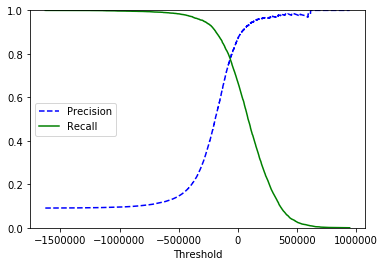

In [37]:
#plot function
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thersholds)

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for you task 

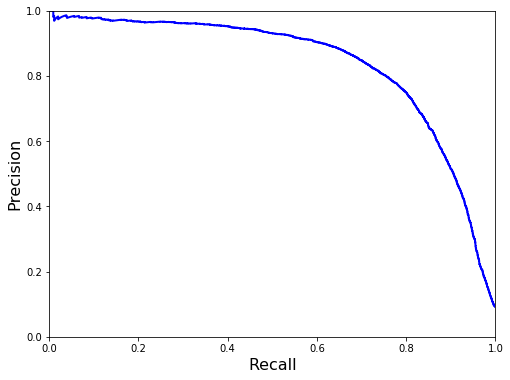

In [38]:
# plot precision vs recall 
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [39]:
# we can see a real trae off around 70-80 Recall. 
## We can manually set a precision using thershold
# going back to the precison threshold plot we can choose a threshold number
y_train_pred_90 = (y_scores > 70000)

In [40]:
precision_score(y_train_5, y_train_pred_90) # lucky

0.9235628553379659

In [41]:
recall_score(y_train_5, y_train_pred_90)

0.5393838775133739

Using a threshold of 70000 we have a trained a 90% precision classifier for identifying 5's (out of only 5's). But we have to be careful. A high precision classifer is not very useful if the recall is very low. We will instead look at using a Receiver Operating Cruve (ROC) for binary classifications.

In [42]:
# ROC curve plots true positives rate against false positve. 
from sklearn.metrics import roc_curve

In [43]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [44]:
def plot_roc_curve(fpr, tpr, label = None): 
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

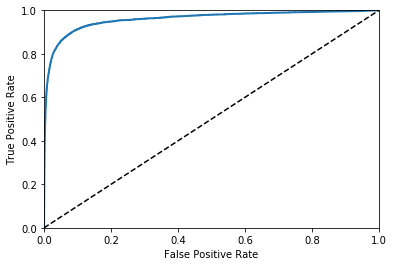

In [45]:
plot_roc_curve(fpr, tpr)

In [46]:
# now we calculate the area under the curve
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(y_train_5, y_scores)

0.9601252814220723

As a rule of thumb, you should use the Precision/Recall curve whenever thr positive class is rare (sparse martix) or when you care more about false positives, otherwise use the ROC curve

In [48]:
# we can also train a Random Forest Classifier
# RF classifiers do not have a decison function instead we will measure the probability predictions
from sklearn.ensemble import RandomForestClassifier

In [49]:
forest_clf = RandomForestClassifier(random_state = 101)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# To plot the ROC curve we need scores (not porbabilities). 
#The simple solution is to use the positive class's probability as a score
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, threshols_forest = roc_curve(y_train_5, y_scores_forest)

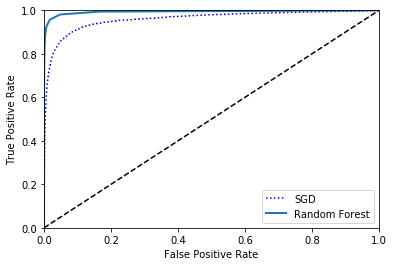

In [51]:
# now we plot both ROC curves to see which one does better
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")

In [52]:
# check the score
roc_auc_score(y_train_5, y_scores_forest)
# almost perfect

0.9936001458654056

# Training a Multiclass Classifier

Sci-kit Learn detects when you try to use a binary classifier and automatically uses the One vs All (OvA).

In [53]:
# notice that we are using the enitre training data set this time 
sgd_clf.fit(X_train, y_train) # y_train
sgd_clf.predict([some_digit]) # remember this is a 5 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=int8)

In [54]:
# so it got it wrong
# pull up the decision score to see what happened? 
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-340807.66202141, -399449.39374784, -329816.54599956,
        -283007.37983248, -177414.3381267 ,  129806.15505117,
        -738140.41282992, -419523.15865509, -569920.34277367,
        -684848.0472794 ]])

In [55]:
# so the classifier created a score for eacy digit and then selected the higest score
np.argmax(some_digit_scores) # notice that zero was the highest
# and it looks like 5 is actually the second highest, 

5

In [56]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [57]:
sgd_clf.classes_[5] # head up this is a coicidence because of the structure of the data

5

In [58]:
# We can force the OvO if we want
from sklearn.multiclass import OneVsOneClassifier

In [59]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 101)) # we are training on every possible pair
ovo_clf.fit(X_train, y_train) # notice this takes a while
ovo_clf.predict([some_digit]) # there are N*(N-1)/2 classifier pairs but this time we got it right

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([3], dtype=int8)

In [60]:
# how many training classfier pairs
len(ovo_clf.estimators_) # 45 training pairs

45

In [61]:
# we can easily run a randomforest
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=int8)

In [62]:
# random forest can do multi class in one go
## we can look at the porbabilities 
forest_clf.predict_proba([some_digit]) # it is very sure

array([[0.1, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0.1, 0. ]])

In [63]:
# so now lets evalute all the classifiers (do the job properly)
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.84573085, 0.86719336, 0.85437816])

In [64]:
# we can scale the imputs to get a better accuracy 
from sklearn.preprocessing import StandardScaler

Standardization first subtracts the mean value (so standardized values always have a zero mean) and then divedes y the variance so that the resulting fistribution has unit variance. This does not bound values to a spesfic range and is much less affected by outliers

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.91006799, 0.90734537, 0.91143672])

In [67]:
# look at error analysis
# we will stay with SGD for this so we have some room for error analysis
# make presictions and validate
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
con_mx = confusion_matrix(y_train, y_train_pred)
con_mx

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([[5726,    4,   24,   10,   10,   46,   49,    9,   42,    3],
       [   2, 6484,   46,   32,    6,   41,    5,   12,  104,   10],
       [  52,   38, 5326,  101,   83,   23,   98,   64,  156,   17],
       [  50,   41,  142, 5357,    2,  234,   31,   58,  127,   89],
       [  17,   28,   36,   10, 5367,    8,   53,   34,   83,  206],
       [  70,   43,   37,  187,   72, 4608,  109,   32,  173,   90],
       [  29,   27,   44,    2,   51,   95, 5622,    7,   41,    0],
       [  23,   19,   77,   24,   56,   11,    6, 5822,   17,  210],
       [  58,  149,   71,  157,   14,  160,   53,   27, 5024,  138],
       [  39,   34,   32,   97,  163,   36,    3,  225,   79, 5241]])

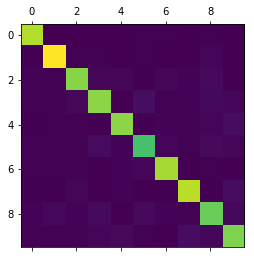

In [68]:
# instead of trying to do this by hand, we can visualize it using matshow
plt.matshow(con_mx)

This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified correctly. The 5's look slightly darker than the other digits, which coukld mean that there are fewer images of 5s in the data set or that the classifier does not perfomr as well on 5s as on other digits. (We know that both are the case). 

In [69]:
# fill in the matrix diagonal so we only keep the errors
# divide each value by number of images in class
# compre error rates (not number of errors)
row_sums = con_mx.sum(axis = 1, keepdims = True)
norm_con_mx = con_mx/row_sums

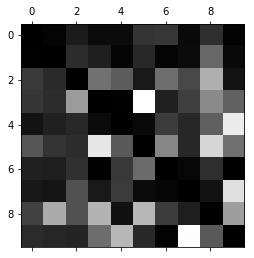

In [70]:
# fill in the diagonals with zeros
np.fill_diagonal(norm_con_mx, 0)
plt.matshow(norm_con_mx, cmap = plt.cm.gray)
# rows represent actual classes
# column represent represent the predicted classes 

The brighter the block, the higher the error. The columns for classes 8 and 9 are relatively bright, which tells us that these tend to get misclassified as 8 or 9. The Rows are also bright, telling us that 8 and 9 get classified as other digits. 3s get classifed as 5s all the time. 

Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at this plt, it seems that your efforts should be spent on imporving the classification of 8s and 03 (overall), as well as fixing the spesific 3 and 5 confusion. You could try to gather more training data for these digits. Or you could engineer new features that would help the classifier- for example an algorithm to count the number of closed loops (think 8 vs 9). Or you could process the images using Scikit-Image.

In [85]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

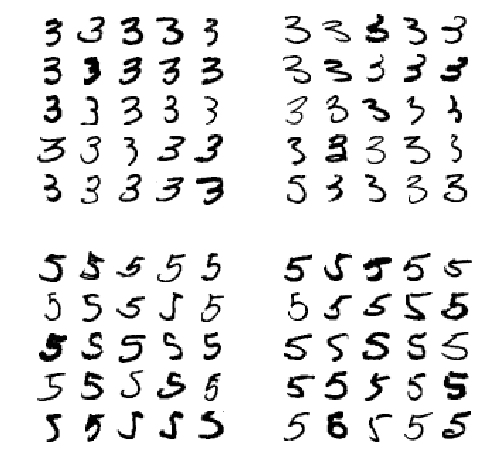

In [72]:
# the left block are classified as 3s
# the right blocks are classified as 5s
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Remember that we are using Stocastic Gradient Decent which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them. 

The main differne between 3s and 5s is the position of the small line that joins the top line with to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. One way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. 

# Multilabel Classification

In [73]:
# using KNN for classification
from sklearn.neighbors import KNeighborsClassifier

In [74]:
y_train_large = (y_train >= 7) # large target
y_train_odd = (y_train % 2 == 1) # odd target
y_multilabel = np.c_[y_train_large, y_train_odd] # array containing two target labels

In [75]:
knn_clf = KNeighborsClassifier()

In [76]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
knn_clf.predict([some_digit]) # not large, is odd

array([[False,  True]])

In [81]:
"""
This is taking super long to run on a local machine. Have to figure out what this is happeing
"""
# evalute using by checking the F1 score for all labels
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

'\nThis is taking super long to run on a local machine. Have to figure out what this is happeing\n'

In [79]:
#f1_score(y_multilabel, y_train_knn_pred, average = 'macro')